In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy.stats

Data_path = 'Data/'

In [2]:
movie_df = pd.read_csv(Data_path+'tmdb_5000_movies.csv', parse_dates=['release_date'])

# create a columns with the year of the coresponding Oscar ceremony for merging latter on
movie_df['ceremony_year'] = movie_df['release_date'].apply(lambda date: date.year+1).fillna(0).astype(int)

In [3]:
oscar_df = pd.read_csv(Data_path+'oscars_website.csv')

In [4]:
# merge on both title and ceremony_year to differentiate two Titanics movies or two King kong movies from different years
df = pd.merge(movie_df, oscar_df, how='left', left_on=['ceremony_year', 'title'], right_on=['Year', 'Films'])
df[['Oscars','Nominations']] = df[['Oscars','Nominations']].fillna(0)

In [5]:
nodes_attributes_df = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'Oscars', 'Nominations']]
nodes_attributes_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,Oscars,Nominations
0,237000000,150.437577,2787965087,162.0,7.2,11800,3.0,9.0
1,300000000,139.082615,961000000,169.0,6.9,4500,0.0,2.0
2,245000000,107.376788,880674609,148.0,6.3,4466,1.0,1.0
3,250000000,112.312950,1084939099,165.0,7.6,9106,0.0,0.0
4,260000000,43.926995,284139100,132.0,6.1,2124,0.0,0.0


# Label imbalance

In [28]:
# Label imbalance (fraction of nodes that have oscars/nomination)

oscars_count = nodes_attributes_df['Oscars'].value_counts()
nominations_count = nodes_attributes_df['Nominations'].value_counts()

oscar_total = np.sum(oscars_count)
nbr_oscars = total - oscars_count[0]

oscar_fraction = nbr_oscars/total

oscar_fraction


nominations_total = np.sum(nominations_count)
nbr_nominations = total - nominations_count[0]

nominations_fraction = nbr_nominations/total

nominations_fraction


0.1784301478242765

# Spearman correlation 

In [7]:
# We do not know if our data are linearly related (assumption behind Pearson), that's why we use Spearman coefficient
# which is a statistical measure of the strength of a monotonic relationship between paired data

# We compute it between oscars (or nominations) and budget, popularity, revenue, runtime, vote average, vote count


In [13]:
corr_df = nodes_attributes_df.corr(method = 'spearman').loc[:,['Oscars','Nominations']]
corr_df.iloc[:-2,:]

,Oscars,Nominations
budget,0.076022,0.152377
popularity,0.204344,0.277595
revenue,0.219884,0.290104
runtime,0.238710,0.342876
vote_average,0.316189,0.437179
vote_count,0.208158,0.286938


# Similarity matrices exploration

In [9]:
sim_mat = {}
names = ['keywords', 'genre', 'crew', 'cast']
for name in names:
    with open(Data_path+'csim_'+name, 'rb') as src:
        sim_mat[name] = pickle.load(src)
        print(f'>>> Loading {name} similarity matrix with shape {sim_mat[name].shape}')

>>> Loading keywords similarity matrix with shape (4803, 4803)
>>> Loading genre similarity matrix with shape (4803, 4803)
>>> Loading crew similarity matrix with shape (4803, 4803)
>>> Loading cast similarity matrix with shape (4803, 4803)


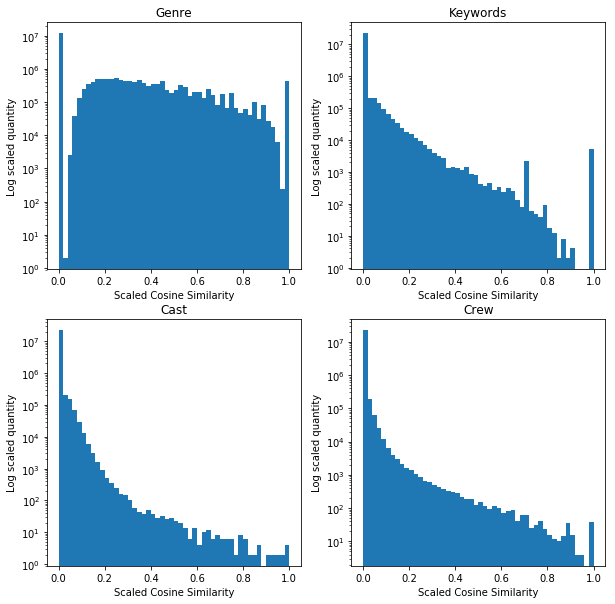

In [10]:

fig, axs = plt.subplots(2, 2,figsize=(10, 10))
titles = ['Genre', 'Keywords', 'Cast', 'Crew']
adj_mat = [ sim_mat['genre'], sim_mat['keywords'], sim_mat['cast'], sim_mat['crew']]
for name, mat, ax in zip(titles, adj_mat, axs.reshape(-1)):
    ax.hist(mat.values.ravel(), log=True, bins=50)
    ax.set_title(name)
    ax.set_xlabel('Scaled Cosine Similarity')
    ax.set_ylabel('Log scaled quantity')
plt.show()

#seaborn --> plus beau
# kernel density distribution kde